In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.simplefilter('ignore')

from auto_learning.models import CLASSIFICATION_MODELS, REGRESSION_MODELS
from auto_learning.hyp_param_search import HypParamSearch

data = load_wine()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

## 分類

### モデルを自分で定義

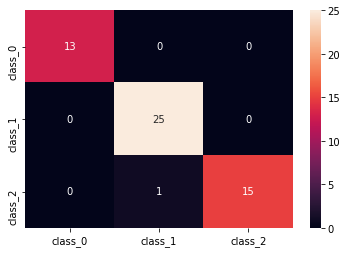

In [17]:
# Logisitic回帰をimport
from sklearn.linear_model import LogisticRegression

# Logistic回帰のハイパラ候補を辞書形式で格納
params = {'C': [10**i for i in range(0, 5)]}

# ハイパラ探索時の条件を指定
# 変数選択をしない
feature_selection = 'None'
# クロスバリデーションはkfoldで行う
crossval_type = 'kfold'
# ハイパラ探索はベイズ最適化で行う
search_type = 'bayes_Gpyopt'
# メトリクスはaccuracy
metrics = 'accuracy'
# 分類問題
problem_type = 'classification'

hyp = HypParamSearch(
    x_train,
    y_train,
    x_test,
    y_test,
    est=LogisticRegression,
    problem_type=problem_type,
    feature_selection=feature_selection,
    params_dict=params,
    crossval_type=crossval_type,
    search_type=search_type,
    metrics=metrics
)
y_test_list, y_test_predicted_list, val_score, test_score, est = hyp.hyp_param_search()

cm = confusion_matrix(y_test_list, y_test_predicted_list)
cm_df = pd.DataFrame(cm, index=data.target_names, columns=data.target_names)
plt.figure()
sns.heatmap(cm_df, annot=True)
plt.show()

### モデルを選択

`CLASSIFICATION_MODELS`中に代表的なモデルとハイパラ候補が格納されているので、それを使う
`CLASSIFICATION_MODELS.keys()`で一覧が確認できる

In [18]:
CLASSIFICATION_MODELS.keys()

dict_keys(['logistic', 'tree', 'rfc', 'svc', 'knc', 'gbc', 'rfc_cc', 'svrsvc'])

svcを選んでみる

In [22]:
func = CLASSIFICATION_MODELS['svc']
est, params = func()
print(est)
print(params)

<class 'sklearn.svm._classes.SVC'>
{'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512], 'gamma': [0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]}


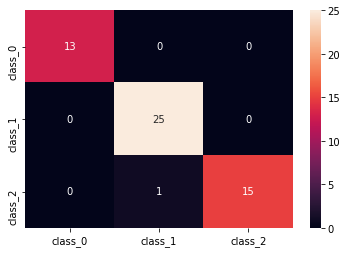

In [21]:
# ハイパラ探索時の条件を指定
# 変数選択をしない
feature_selection = 'None'
# クロスバリデーションはkfoldで行う
crossval_type = 'kfold'
# ハイパラ探索はベイズ最適化で行う
search_type = 'bayes_Gpyopt'
# メトリクスはaccuracy
metrics = 'accuracy'
# 分類問題
problem_type = 'classification'

hyp = HypParamSearch(
    x_train,
    y_train,
    x_test,
    y_test,
    est=est,
    problem_type=problem_type,
    feature_selection=feature_selection,
    params_dict=params,
    crossval_type=crossval_type,
    search_type=search_type,
    metrics=metrics
)
y_test_list, y_test_predicted_list, val_score, test_score, est = hyp.hyp_param_search()

cm = confusion_matrix(y_test_list, y_test_predicted_list)
cm_df = pd.DataFrame(cm, index=data.target_names, columns=data.target_names)
plt.figure()
sns.heatmap(cm_df, annot=True)
plt.show()

## 回帰

In [27]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

`REGRESSION_MODELS`中に代表的なモデルとハイパラ候補が格納されているので、それを使う
`REGRESSION_MODELS.keys()`で一覧が確認できる

In [28]:
REGRESSION_MODELS.keys()

dict_keys(['ridge', 'lasso', 'svr', 'rfr', 'pca_ridge', 'pca_lasso'])

In [35]:
# SVRを選択
func = REGRESSION_MODELS['svr']
est, params = func()

print(est)

for param in params.items():
    print(param)

<class 'sklearn.svm._classes.SVR'>
('C', [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])
('epsilon', [0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1])
('gamma', [9.5367431640625e-07, 1.9073486328125e-06, 3.814697265625e-06, 7.62939453125e-06, 1.52587890625e-05, 3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])


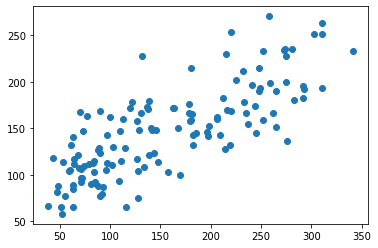

r2 score =  0.5646058471323482


In [36]:
# ハイパラ探索時の条件を指定
# 変数選択をしない
feature_selection = 'None'
# クロスバリデーションはkfoldで行う
crossval_type = 'kfold'
# ハイパラ探索はベイズ最適化で行う
search_type = 'bayes_Gpyopt'
# メトリクスはr2 score
metrics = 'r2'
# 回帰問題
problem_type = 'regression'

hyp = HypParamSearch(
    x_train,
    y_train,
    x_test,
    y_test,
    est=est,
    problem_type=problem_type,
    feature_selection=feature_selection,
    params_dict=params,
    crossval_type=crossval_type,
    search_type=search_type,
    metrics=metrics
)
y_test_list, y_test_predicted_list, val_score, test_score, est = hyp.hyp_param_search()

plt.figure()
plt.scatter(y_test_list, y_test_predicted_list)
plt.show()

print('r2 score = ', test_score)